In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#from scipy.stats import uniform

# from imblearn.under_sampling import RandomUnderSampler

#from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier

#from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss

import matplotlib.pyplot as plt

import datetime

import warnings

warnings.filterwarnings('ignore')

#import torch

#from torch.utils.data import DataLoader, TensorDataset

In [10]:
train = pd.read_csv('../dataset_processed/train_538132.csv')
val = pd.read_csv('../dataset_processed/validation_179377.csv')
test = pd.read_csv('../dataset_processed/test_179378.csv')

In [ ]:
X_train = train.drop('depvar', axis=1)
y_train = train['depvar']

X_val = val.drop('depvar', axis=1)
y_val = val['depvar']

X_test = test.drop('depvar', axis=1)
y_test = test['depvar']

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(538132, 86)
(538132,)
(179377, 86)
(179377,)
(179378, 86)
(179378,)


In [6]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 150)
evals = [(X_val,y_val)]

params = {'num_leaves': [16,32, 64],
          'max_depth':[5,10,30],
          # 'min_child_samples':[60, 100],
          'min_data_in_leaf':[100,200]
         }

# 하이퍼 파라미터 테스트 수행속도 향상을 위해 cv 지정하지 않음
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set = evals)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[85]	valid_0's auc: 0.663171	valid_0's binary_logloss: 0.420178
[86]	valid_0's auc: 0.663141	valid_0's binary_logloss: 0.420187
[87]	valid_0's auc: 0.663121	valid_0's binary_logloss: 0.420189
[88]	valid_0's auc: 0.663143	valid_0's binary_logloss: 0.420175
[89]	valid_0's auc: 0.66316	valid_0's binary_logloss: 0.420169
[90]	valid_0's auc: 0.663179	valid_0's binary_logloss: 0.420159
[91]	valid_0's auc: 0.663184	valid_0's binary_logloss: 0.420155
[92]	valid_0's auc: 0.663154	valid_0's binary_logloss: 0.420163
[93]	valid_0's auc: 0.663184	valid_0's binary_logloss: 0.420152
[94]	valid_0's auc: 0.663175	valid_0's binary_logloss: 0.420159
[95]	valid_0's auc: 0.663199	valid_0's binary_logloss: 0.420149
[96]	valid_0's auc: 0.663163	valid_0's binary_logloss: 0.420154
[97]	valid_0's auc: 0.663177	valid_0's binary_logloss: 0.420147
[98]	valid_0's auc: 0.663126	valid_0's binary_logloss: 0.420158
[99]	valid_0's auc: 0.663127	valid_0's binary_logloss: 0.420161
[100]

GridSearchCV(estimator=LGBMClassifier(n_estimators=150),
             param_grid={'max_depth': [5, 10, 30],
                         'min_data_in_leaf': [100, 200],
                         'num_leaves': [16, 32, 64]})

In [10]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)


GridSearchCV 최적 파라미터: {'max_depth': 30, 'min_data_in_leaf': 200, 'num_leaves': 64}


In [12]:
# Define the pipeline
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 150,max_depth = 30,min_data_in_leaf = 200,num_leaves = 64)

evals = [(X_val,y_val)]
lgbm.fit(X_train,y_train, early_stopping_rounds = 100,eval_set = evals,eval_metric = 'logloss',verbose = True)
# pipeline = Pipeline([
#     ('clf', RandomForestClassifier())
# ])

[1]	valid_0's binary_logloss: 0.440515	valid_0's binary_logloss: 0.440515
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.438335	valid_0's binary_logloss: 0.438335
[3]	valid_0's binary_logloss: 0.436521	valid_0's binary_logloss: 0.436521
[4]	valid_0's binary_logloss: 0.434978	valid_0's binary_logloss: 0.434978
[5]	valid_0's binary_logloss: 0.433644	valid_0's binary_logloss: 0.433644
[6]	valid_0's binary_logloss: 0.432453	valid_0's binary_logloss: 0.432453
[7]	valid_0's binary_logloss: 0.431433	valid_0's binary_logloss: 0.431433
[8]	valid_0's binary_logloss: 0.430536	valid_0's binary_logloss: 0.430536
[9]	valid_0's binary_logloss: 0.429676	valid_0's binary_logloss: 0.429676
[10]	valid_0's binary_logloss: 0.428991	valid_0's binary_logloss: 0.428991
[11]	valid_0's binary_logloss: 0.42836	valid_0's binary_logloss: 0.42836
[12]	valid_0's binary_logloss: 0.427764	valid_0's binary_logloss: 0.427764
[13]	valid_0's binary_logloss: 0.427197	valid_0'

LGBMClassifier(max_depth=30, min_data_in_leaf=200, n_estimators=150,
               num_leaves=64)

In [13]:
preds_proba = lgbm.predict_proba(X_val)

In [14]:
preds_proba[:,1]

array([0.28023545, 0.12967133, 0.24936708, ..., 0.12325613, 0.16528133,
       0.16366641])

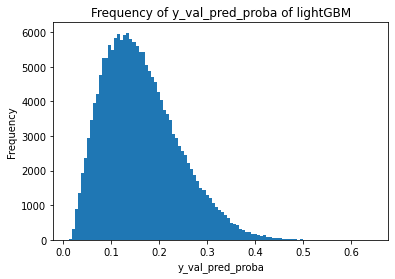

In [15]:
# Predict probabilities for new data
 # 확률로 추정된 X_val의 y_pred

plt.hist(preds_proba[:,1], bins=100)

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_val_pred_proba of lightGBM')

#plt.savefig("%s_val_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

In [16]:
threshold_list = np.linspace(0.1,0.18,10) # 짝수개 값 (예시 10개)

In [17]:
def threshold_func(y_val, y_pred_proba, threshold_list):
    
    n = len(threshold_list)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
    
    fig, axes = plt.subplots(nrows=int(n/2), ncols=2, figsize=(10, 10))
    
    for i in range(len(threshold_list)):
        
        threshold = threshold_list[i]
        
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))
        
        # count 0, 1 in Binarizer(y hat)
        unique, counts = np.unique(custom_predict, return_counts=True)

        for val, count in zip(unique, counts):
            if len(unique) == 1:
                if val == 1.0:
                    num_0_pred = 0
                    num_1_pred = count
                elif val == 0.0:
                    num_1_pred = 0
                    num_0_pred = count
            if val == 1.0:
                num_1_pred = count
            elif val == 0.0:
                num_0_pred = count

        # count 0, 1 in y hat
        num_0_real = y_val.value_counts()[0]
        num_1_real = y_val.value_counts()[1]
        
        tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
        count = [tn, fp, fn, tp]
        tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]
        
        accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
        precision = round(tp/(tp+fp),4)
        recall = round(tp/(tp+fn),4)
        f1 = round(2*(precision*recall)/(precision+recall),4)
        
        threshold_tag = round(threshold_list[i], 4)
        
        result_df[threshold_tag] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]
        
        labels = ['TN','FP','FN','TP']
        
        # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
        counts = [tn, fp, fn, tp]

        # 해당하는 subplot에 그래프 그리기
        axes[i//2, i%2].bar(labels, counts)
        axes[i//2, i%2].set_title(threshold_tag)
        axes[i//2, i%2].set_ylabel('Count')

    # 그래프 간격 조절하기
    plt.tight_layout()
    
    #plt.savefig("%s_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

    # 그래프 출력하기
    plt.show()
    
    #result_df.to_csv('%s_threshold_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True)
    
    return result_df

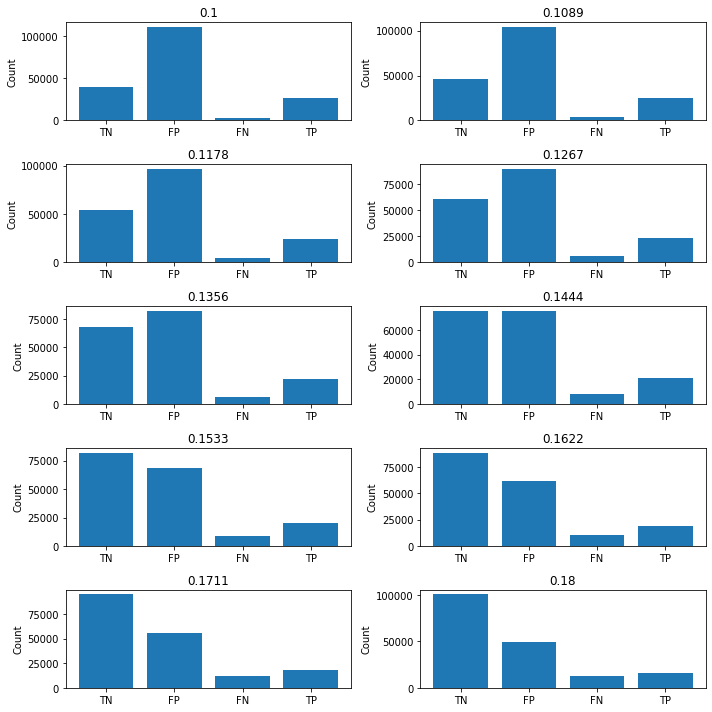

,0.1000,0.1089,0.1178,0.1267,0.1356,0.1444,0.1533,0.1622,0.1711,0.1800
1_real,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000
1_pred,137042.0000,129211.0000,120953.0000,112844.0000,104498.0000,96261.0000,88363.0000,80531.0000,73077.0000,66040.0000
0_real,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000
0_pred,42335.0000,50166.0000,58424.0000,66533.0000,74879.0000,83116.0000,91014.0000,98846.0000,106300.0000,113337.0000
tn,39418.0000,46412.0000,53753.0000,60916.0000,68201.0000,75337.0000,82043.0000,88653.0000,94823.0000,100652.0000
fp,110884.0000,103890.0000,96549.0000,89386.0000,82101.0000,74965.0000,68259.0000,61649.0000,55479.0000,49650.0000
fn,2917.0000,3754.0000,4671.0000,5617.0000,6678.0000,7779.0000,8971.0000,10193.0000,11477.0000,12685.0000
tp,26158.0000,25321.0000,24404.0000,23458.0000,22397.0000,21296.0000,20104.0000,18882.0000,17598.0000,16390.0000
tn_%,22.0000,25.9000,30.0000,34.0000,38.0000,42.0000,45.7000,49.4000,52.9000,56.1000
fp_%,61.8000,57.9000,53.8000,49.8000,45.8000,41.8000,38.1000,34.4000,30.9000,27.7000


In [18]:
threshold_func(y_val, preds_proba, threshold_list)

### Threshold에 따른 목적함수 값 비교

In [19]:
OPT_threshold = None
OPT_expected_loss = None
model_name = 'LightGBM'
def objective_func(y_pred_proba, threshold_list):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
        
        expected_loss_list = []
        
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
            
            # make Binarizer(y hat)
            binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
            custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

            tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
            count = [tn, fp, fn, tp]
            
            tpr_1 = fn / (fn + tp)
            fpr = fp / (fp + tn)
            w1 = 0.55
            w2 = 0.45
            
            expected_loss = w1 * tpr_1 + w2 * fpr
            
            expected_loss_list.append(expected_loss)
            
            threshold_tag = round(threshold_list[i], 4)
        
            result_df[threshold_tag] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]
            
            if i == 0:
                opt_threshold = threshold
                opt_expected_loss = expected_loss
            else:
                if opt_expected_loss > expected_loss:
                    opt_threshold = threshold
                    opt_expected_loss = expected_loss
                    
#         expected_loss_list = [round(x, 1) for x in expected_loss_list]

        print(opt_threshold)
        print(opt_expected_loss)
        
        plt.plot(threshold_list, expected_loss_list)
        plt.scatter(threshold_list, expected_loss_list)
        
        plt.xlabel('Threshold')
        plt.ylabel('Expected_Loss')
        plt.title('Expected Loss of Thresholds of %s'%(model_name))

        #plt.savefig("%s_expected_loss_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
        
        plt.show()
        
        global OPT_threshold
        OPT_threshold = opt_threshold
        global OPT_expected_loss
        OPT_expected_loss = opt_expected_loss
        
        #result_df.to_csv('%s_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.3f', index=True)
        
        return result_df

0.14444444444444443
0.3715953137880166


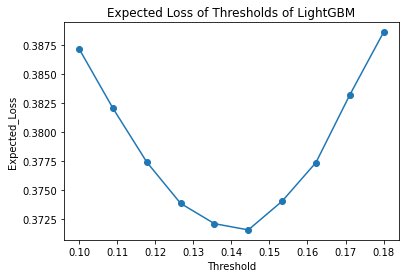

,0.1000,0.1089,0.1178,0.1267,0.1356,0.1444,0.1533,0.1622,0.1711,0.1800
1-TPR,0.100327,0.129114,0.160653,0.193190,0.229682,0.267549,0.308547,0.350576,0.394738,0.436285
FPR,0.737741,0.691208,0.642367,0.594709,0.546240,0.498762,0.454146,0.410168,0.369117,0.330335
w1_1-TPR,0.055180,0.071013,0.088359,0.106255,0.126325,0.147152,0.169701,0.192817,0.217106,0.239957
w2_FPR,0.331984,0.311044,0.289065,0.267619,0.245808,0.224443,0.204366,0.184575,0.166103,0.148651
Expected_loss,0.387163,0.382057,0.377424,0.373874,0.372133,0.371595,0.374066,0.377392,0.383208,0.388608


In [20]:
objective_func(preds_proba, threshold_list)


In [21]:
OPT_threshold

0.14444444444444443

### histogram에 optimal threshold 표시


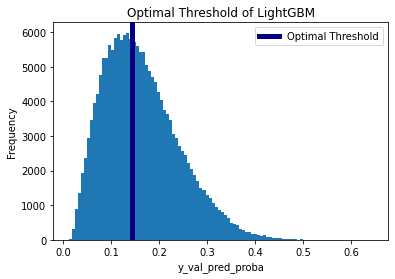

In [22]:
plt.hist(preds_proba[:,1], bins=100)

plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of %s'%(model_name))
plt.legend()

#plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

### test 데이터로 lightGBM 돌려보기

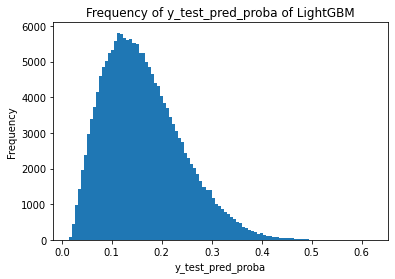

In [23]:
# Predict probabilities for new data
y_test_pred_proba = lgbm.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)

plt.xlabel('y_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_test_pred_proba of %s'%(model_name))

#plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_test_pred_proba의 분포 확인

In [24]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    #plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    #result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

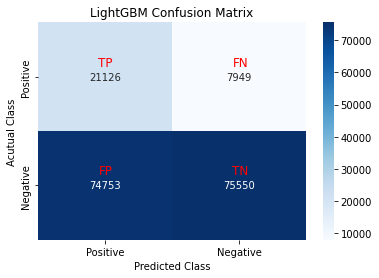

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,83499.0,29075.0,95879.0,75550.0,74753.0,7949.0,21126.0,42.1,41.7,4.4,11.8,0.539,0.2203,0.7266,0.3381


In [25]:
test_func(y_test, y_test_pred_proba, OPT_threshold)

In [26]:
def test_objective_func(y_test, y_pred_proba, threshold):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
            
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

        tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
        count = [tn, fp, fn, tp]

        tpr_1 = fn / (fn + tp)
        fpr = fp / (fp + tn)
        w1 = 0.55
        w2 = 0.45

        expected_loss = w1 * tpr_1 + w2 * fpr

        result_df[threshold] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]

        print(expected_loss)
        
        result_df.T.to_csv('%s_test_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.6f', index=True)
        
        return result_df

In [27]:
test_objective_func(y_test, y_test_pred_proba, OPT_threshold)

0.37417492379923945


,0.144444
1-TPR,0.273396
FPR,0.497349
w1_1-TPR,0.150368
w2_FPR,0.223807
Expected_loss,0.374175


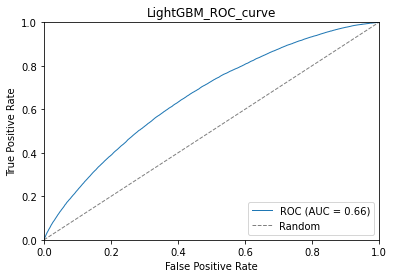

In [28]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()

## 차원 축소 데이터로 진행

In [29]:
compressed_train= pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/train_compressed.csv')
compressed_test = pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/test_compressed.csv')
compressed_valid = pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/validation_compressed.csv')

In [30]:
compressed_train.drop(['Unnamed: 0'],axis = 1,inplace =True)
compressed_test.drop(['Unnamed: 0'],axis = 1,inplace =True)
compressed_valid.drop(['Unnamed: 0'],axis = 1,inplace =True)

In [31]:
X_train_compressed ,y_train_compressed  = compressed_train.drop(['depvar'],axis=1),compressed_train['depvar']
X_test_compressed ,y_test_compressed  = compressed_test.drop(['depvar'],axis=1),compressed_test['depvar']
X_valid_compressed ,y_valid_compressed  = compressed_valid.drop(['depvar'],axis=1),compressed_valid['depvar']

In [32]:
print(X_train_compressed.shape,y_train_compressed.shape)
print(X_test_compressed.shape,y_test_compressed.shape)
print(X_valid_compressed.shape,y_valid_compressed.shape)

(538132, 20) (538132,)
(179378, 20) (179378,)
(179377, 20) (179377,)


In [46]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 150)
evals = [(X_valid_compressed,y_valid_compressed)]

params = {'num_leaves': [16,32, 64],
          'max_depth':[5,10,30],
          # 'min_child_samples':[60, 100],
          'min_data_in_leaf':[100,200]
         }

# 하이퍼 파라미터 테스트 수행속도 향상을 위해 cv 지정하지 않음
gridcv_compress = GridSearchCV(lgbm_clf, param_grid=params)
gridcv_compress.fit(X_train_compressed, y_train_compressed, early_stopping_rounds=30, eval_metric="auc",
           eval_set = evals)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[43]	valid_0's auc: 0.596551	valid_0's binary_logloss: 0.435669
[44]	valid_0's auc: 0.596779	valid_0's binary_logloss: 0.435619
[45]	valid_0's auc: 0.596973	valid_0's binary_logloss: 0.435567
[46]	valid_0's auc: 0.597234	valid_0's binary_logloss: 0.435506
[47]	valid_0's auc: 0.597249	valid_0's binary_logloss: 0.435481
[48]	valid_0's auc: 0.597532	valid_0's binary_logloss: 0.435424
[49]	valid_0's auc: 0.597705	valid_0's binary_logloss: 0.435369
[50]	valid_0's auc: 0.597645	valid_0's binary_logloss: 0.435359
[51]	valid_0's auc: 0.597614	valid_0's binary_logloss: 0.435334
[52]	valid_0's auc: 0.597664	valid_0's binary_logloss: 0.435301
[53]	valid_0's auc: 0.598121	valid_0's binary_logloss: 0.435225
[54]	valid_0's auc: 0.598519	valid_0's binary_logloss: 0.435143
[55]	valid_0's auc: 0.598916	valid_0's binary_logloss: 0.435075
[56]	valid_0's auc: 0.599081	valid_0's binary_logloss: 0.435036
[57]	valid_0's auc: 0.59906	valid_0's binary_logloss: 0.435017
[58]	

GridSearchCV(estimator=LGBMClassifier(n_estimators=150),
             param_grid={'max_depth': [5, 10, 30],
                         'min_data_in_leaf': [100, 200],
                         'num_leaves': [16, 32, 64]})

In [49]:
print('GridSearchCV 최적 파라미터:', gridcv_compress.best_params_)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)


GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_data_in_leaf': 100, 'num_leaves': 16}
GridSearchCV 최적 파라미터: {'max_depth': 30, 'min_data_in_leaf': 200, 'num_leaves': 64}


In [50]:
lgbm_com= LGBMClassifier(n_estimators = 150,max_depth = 5,min_data_in_leaf = 100,num_leaves = 16)

evals = [(X_valid_compressed,y_valid_compressed)]
lgbm_com.fit(X_train_compressed,y_train_compressed, early_stopping_rounds = 100,eval_set = evals,eval_metric = 'logloss',verbose = True)


[1]	valid_0's binary_logloss: 0.442744	valid_0's binary_logloss: 0.442744
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.442455	valid_0's binary_logloss: 0.442455
[3]	valid_0's binary_logloss: 0.442198	valid_0's binary_logloss: 0.442198
[4]	valid_0's binary_logloss: 0.441893	valid_0's binary_logloss: 0.441893
[5]	valid_0's binary_logloss: 0.441537	valid_0's binary_logloss: 0.441537
[6]	valid_0's binary_logloss: 0.44129	valid_0's binary_logloss: 0.44129
[7]	valid_0's binary_logloss: 0.441076	valid_0's binary_logloss: 0.441076
[8]	valid_0's binary_logloss: 0.4409	valid_0's binary_logloss: 0.4409
[9]	valid_0's binary_logloss: 0.440692	valid_0's binary_logloss: 0.440692
[10]	valid_0's binary_logloss: 0.440497	valid_0's binary_logloss: 0.440497
[11]	valid_0's binary_logloss: 0.440342	valid_0's binary_logloss: 0.440342
[12]	valid_0's binary_logloss: 0.440184	valid_0's binary_logloss: 0.440184
[13]	valid_0's binary_logloss: 0.439985	valid_0's bi

LGBMClassifier(max_depth=5, min_data_in_leaf=100, n_estimators=150,
               num_leaves=16)

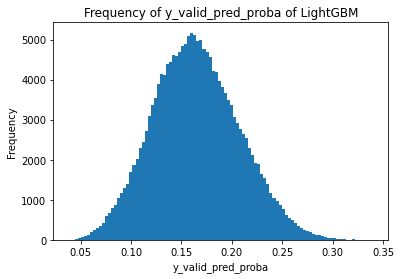

In [51]:
# Predict probabilities for new data
y_valid_pred_proba = lgbm_com.predict_proba(X_valid_compressed) # 확률로 추정된 X_test의 y_pred

plt.hist(y_valid_pred_proba[:,1], bins=100)

plt.xlabel('y_valid_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_valid_pred_proba of LightGBM')

#plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show()

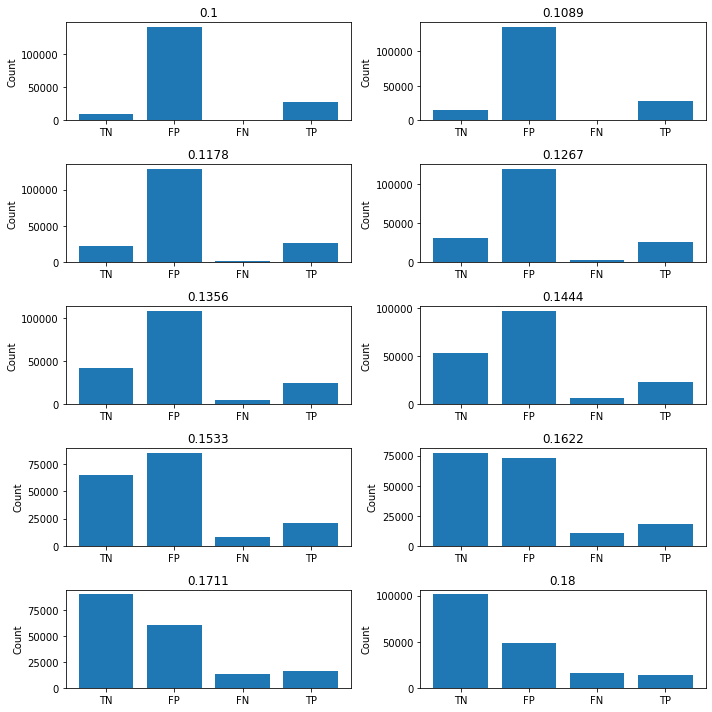

,0.1000,0.1089,0.1178,0.1267,0.1356,0.1444,0.1533,0.1622,0.1711,0.1800
1_real,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000
1_pred,168807.0000,163001.0000,155385.0000,145206.0000,133112.0000,119823.0000,105886.0000,90939.0000,76122.0000,62364.0000
0_real,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000
0_pred,10570.0000,16376.0000,23992.0000,34171.0000,46265.0000,59554.0000,73491.0000,88438.0000,103255.0000,117013.0000
tn,9845.0000,15104.0000,21931.0000,30987.0000,41547.0000,53077.0000,64954.0000,77523.0000,89907.0000,101289.0000
fp,140457.0000,135198.0000,128371.0000,119315.0000,108755.0000,97225.0000,85348.0000,72779.0000,60395.0000,49013.0000
fn,725.0000,1272.0000,2061.0000,3184.0000,4718.0000,6477.0000,8537.0000,10915.0000,13348.0000,15724.0000
tp,28350.0000,27803.0000,27014.0000,25891.0000,24357.0000,22598.0000,20538.0000,18160.0000,15727.0000,13351.0000
tn_%,5.5000,8.4000,12.2000,17.3000,23.2000,29.6000,36.2000,43.2000,50.1000,56.5000
fp_%,78.3000,75.4000,71.6000,66.5000,60.6000,54.2000,47.6000,40.6000,33.7000,27.3000


In [52]:
threshold_func(y_valid_compressed, y_valid_pred_proba, threshold_list)

0.14444444444444443
0.41361172683079467


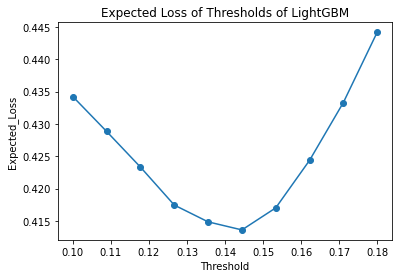

,0.1000,0.1089,0.1178,0.1267,0.1356,0.1444,0.1533,0.1622,0.1711,0.1800
1-TPR,0.024936,0.043749,0.070886,0.109510,0.162270,0.222769,0.293620,0.375408,0.459089,0.540808
FPR,0.934499,0.899509,0.854087,0.793835,0.723577,0.646864,0.567843,0.484218,0.401824,0.326097
w1_1-TPR,0.013715,0.024062,0.038987,0.060230,0.089248,0.122523,0.161491,0.206475,0.252499,0.297445
w2_FPR,0.420524,0.404779,0.384339,0.357226,0.325609,0.291089,0.255530,0.217898,0.180821,0.146744
Expected_loss,0.434239,0.428841,0.423326,0.417456,0.414858,0.413612,0.417021,0.424373,0.433320,0.444188


In [53]:
objective_func(y_valid_pred_proba, threshold_list)


In [54]:
OPT_threshold

0.14444444444444443

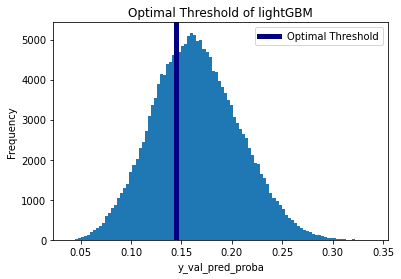

In [55]:
plt.hist(y_valid_pred_proba[:,1], bins=100)

plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of lightGBM')
plt.legend()

#plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

## 차원축소 test 데이터로 돌리기

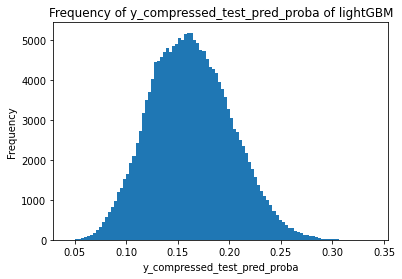

In [56]:
# Predict probabilities for new data
y_compressed_test_pred_proba = lgbm_com.predict_proba(X_test_compressed) # 확률로 추정된 X_test의 y_pred

plt.hist(y_compressed_test_pred_proba[:,1], bins=100)

plt.xlabel('y_compressed_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_compressed_test_pred_proba of lightGBM')

#plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_compressed_test_pred_proba의 분포 확인

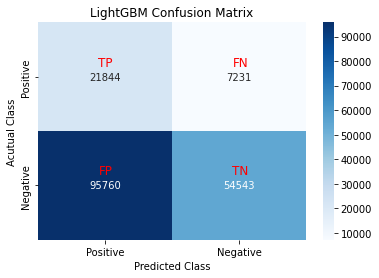

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,61774.0,29075.0,117604.0,54543.0,95760.0,7231.0,21844.0,30.4,53.4,4.0,12.2,0.4258,0.1857,0.7513,0.2978


In [57]:
test_func(y_test_compressed, y_compressed_test_pred_proba, OPT_threshold)

In [58]:
test_objective_func(y_test_compressed, y_compressed_test_pred_proba, OPT_threshold)

0.4234867627924696


,0.144444
1-TPR,0.248702
FPR,0.637113
w1_1-TPR,0.136786
w2_FPR,0.286701
Expected_loss,0.423487


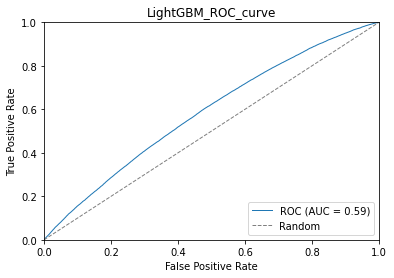

In [59]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test_compressed, y_compressed_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()